In [5]:
import pandas as pd

# 두 번째 시트(인덱스 1)를 읽어옵니다
df = pd.read_excel("/Users/seunghyun/Downloads/book_analysis (4).xlsx", sheet_name=1)
df



,도서명,대출년월,대출건수,순위
0,나미야 잡화점의 기적 :히가시노 게이고 장편소설,2023년 08월,1956,73
1,나미야 잡화점의 기적 :히가시노 게이고 장편소설,2023년 09월,1530,101
2,나미야 잡화점의 기적 :히가시노 게이고 장편소설,2023년 10월,1375,148
3,나미야 잡화점의 기적 :히가시노 게이고 장편소설,2023년 11월,1347,154
4,나미야 잡화점의 기적 :히가시노 게이고 장편소설,2023년 12월,1563,106
...,...,...,...,...
94,82년생 김지영 :조남주 장편소설,2024년 02월,327,3574
95,82년생 김지영 :조남주 장편소설,2024년 03월,347,3731
96,82년생 김지영 :조남주 장편소설,2024년 04월,264,4744
97,82년생 김지영 :조남주 장편소설,2024년 05월,301,3583


책 제목을 입력해주세요:  82년생 김지영 :조남주 장편소설


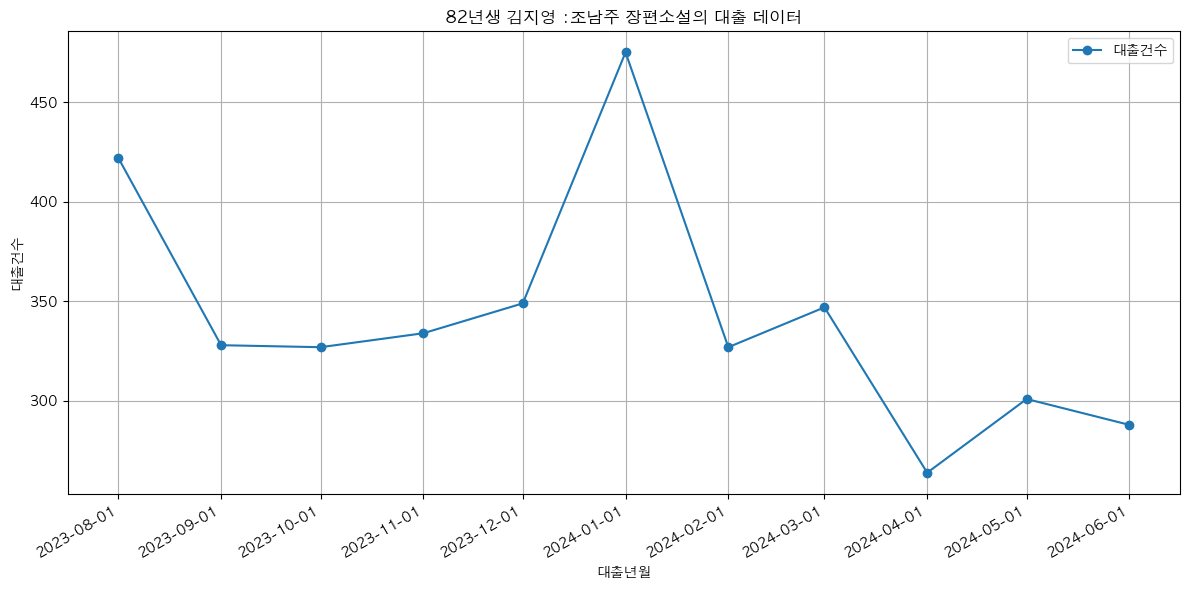

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.dates import DateFormatter

# Matplotlib의 한글 폰트 설정
rcParams['font.family'] = 'AppleGothic'  # MacOS의 경우

# 책 제목 입력 받기
bookname = input("책 제목을 입력해주세요: ")

# 입력된 책 제목에 해당하는 데이터 필터링
filtered_df = df[df['도서명'] == bookname].copy()  # .copy()로 복사하여 경고 방지

# '대출년월' 열을 datetime 형식으로 변환
filtered_df['대출년월'] = pd.to_datetime(filtered_df['대출년월'], format='%Y년 %m월')

# 데이터가 있는지 확인
if filtered_df.empty:
    print(f"'{bookname}'에 대한 데이터가 없습니다.")
else:
    # 그래프 그리기
    plt.figure(figsize=(12, 6))  # 그래프 크기 조정
    plt.plot(filtered_df['대출년월'], filtered_df['대출건수'], label='대출건수', marker='o')  # 대출건수 데이터 시리즈
    
    plt.xlabel('대출년월')  # x축 레이블 설정
    plt.ylabel('대출건수')  # y축 레이블 설정
    plt.title(f'{bookname}의 대출 데이터')  # 그래프 제목 설정
    plt.legend()  # 범례 추가
    plt.grid(True)  # 그리드 추가
    
    # x축 날짜 포맷 설정 및 레이블 회전
    ax = plt.gca()  # 현재 축을 가져옵니다
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # 날짜 포맷 설정
    plt.gcf().autofmt_xdate()  # x축 날짜 레이블 자동 회전
    
    plt.tight_layout()  # 레이아웃 조정
    plt.show()
